<center><h1><span style="color: green;">THỰC HÀNH BUỔI 2</span></h1></center>

# <span style="color: gray;">A. PHƯƠNG PHÁP K-NEAREST NEIGHBORS</span>

## Ví dụ A.1

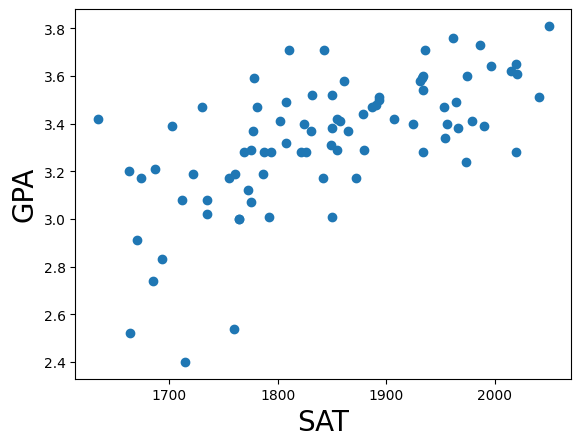

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Change to data path on your computer
data = \
pd.read_csv("SAT_GPA.csv")

# Show the description of data
data.describe()

# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


In [20]:
k = 8

def distance(array, value):
   array = np.array(array)
   return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(x)

# Lấy 64 mẫu dữ liệu đầu cho tập training
X_train = np.array(x[:64])
Y_train = np.array(y[:64])

# Dùng phần dữ liệu còn lại cho tập test
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(f"{i+1} ",Y_pred[i], ' | ', Y_test[i])
        
MSE = mean_squared_error(Y_pred, Y_test)
MAE = mean_absolute_error(Y_pred, Y_test)
R2 = r2_score(Y_test, Y_pred)
        
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {R2}")

1  3.3925000000000005  |  3.51
2  3.2749999999999995  |  3.52
3  3.2949999999999995  |  3.52
4  3.3975000000000004  |  3.54
5  3.295  |  3.58
6  3.3974999999999995  |  3.58
7  3.3975000000000004  |  3.59
8  3.2587500000000005  |  3.59
9  3.3899999999999997  |  3.6
10  3.3975000000000004  |  3.6
11  3.3874999999999993  |  3.61
12  3.3874999999999993  |  3.62
13  3.3662499999999995  |  3.64
14  3.3874999999999993  |  3.65
15  3.2950000000000004  |  3.71
16  3.3975000000000004  |  3.71
17  3.30875  |  3.71
18  3.3662500000000004  |  3.73
19  3.37625  |  3.76
20  3.3874999999999993  |  3.81
MSE: 0.08137789062500003
MAE: 0.2711875000000001
R_square: -10.951518670142466


## Ví dụ A.2

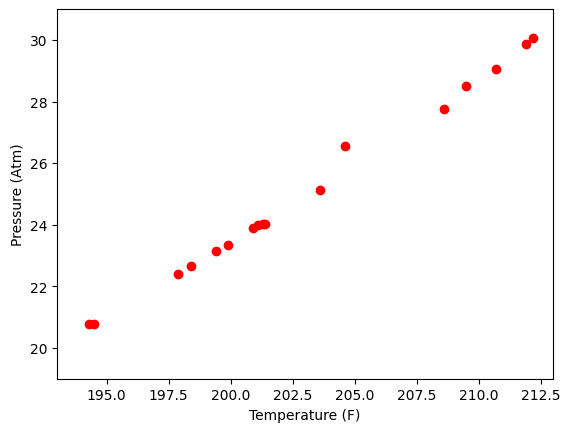

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()


In [ ]:
k = 4

def distance(array, value):
   array = np.array(array)
   return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(X)

# Lấy 16 mẫu dữ liệu đầu cho tập training
X_train = np.array(X[:16])
Y_train = np.array(y[:16])

# Dùng phần dữ liệu còn lại cho tập test
X_test = np.array(X[16:data_len])
Y_test = np.array(y[16:data_len])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(f"{i+1} ",Y_pred[i], ' | ', Y_test[i][0])
        
MSE = mean_squared_error(Y_pred, Y_test)
MAE = mean_absolute_error(Y_pred, Y_test)
R2 = r2_score(Y_test, Y_pred)
        
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {R2}")

[[194.5]
 [194.3]
 [197.9]
 [198.4]
 [199.4]
 [199.9]
 [200.9]
 [201.1]
 [201.4]
 [201.3]
 [203.6]
 [204.6]
 [209.5]
 [208.6]
 [210.7]
 [211.9]]
1  20.79  |  30.06
MSE: 85.93289999999999
MAE: 9.27
R_square: nan


C:\Users\TIEN DAT\AppData\Local\Temp\ipykernel_8212\2593684327.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = Y_pred[i] + Y_train[id]
c:\Users\TIEN DAT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Ví dụ A.3

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [ ]:
k = 6

    # Vì dữ liệu là nhiều chiều nên ta sử dụng chuẩn giữa hai vector.
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1) # ord = 2 (chuẩn L2 - chuẩn Euclidean); axis=0 tương ứng tính theo cột|axis=1 tính theo hàng

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k] # Trả về một mảng chứa K "chỉ số" của các điểm gần nhất trong array so với value.

data_len = len(x_data)

# Lấy 40 mẫu dữ liệu đầu cho tập training
X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])

# Dùng phần dữ liệu còn lại cho tập test
X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(f"{i+1} ",Y_pred[i], ' | ', Y_test[i][0])
        
MSE = mean_squared_error(Y_pred, Y_test)
MAE = mean_absolute_error(Y_pred, Y_test)
R2 = r2_score(Y_test, Y_pred)
        
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {R2}")

1  655.9029512433245  |  711.7330576894062
2  638.4560580336707  |  697.0527770609517
3  638.4560580336706  |  638.2310609545192
4  611.9269910198954  |  681.100136591545
5  655.9029512433245  |  591.4999458878183
6  644.4898294882122  |  691.0227118608703
7  588.0444680617263  |  681.0311214380635
8  605.0998495739349  |  576.0697495580029
9  662.653139627235  |  562.4109333021843
10  584.9524291587197  |  581.7937169457123
11  644.4898294882122  |  842.7917524261421
MSE: 6956.363785903602
MAE: 65.31640461096231
R_square: -0.13937316912292097


C:\Users\TIEN DAT\AppData\Local\Temp\ipykernel_15752\4139252921.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = Y_pred[i] + Y_train[id]


# <span style="color: gray;">B. PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH</span>

## Ví dụ B.1

Hệ số góc (slope, β1): 0.5228924007846357
Hệ số chặn (intercept, β0): -81.06372712865588

Kết quả đánh giá:
Mean Squared Error (MSE): 0.04783194197896838
Mean Absolute Error (MAE): 0.1615749422573339
R-squared (R2): 0.9944281526462317


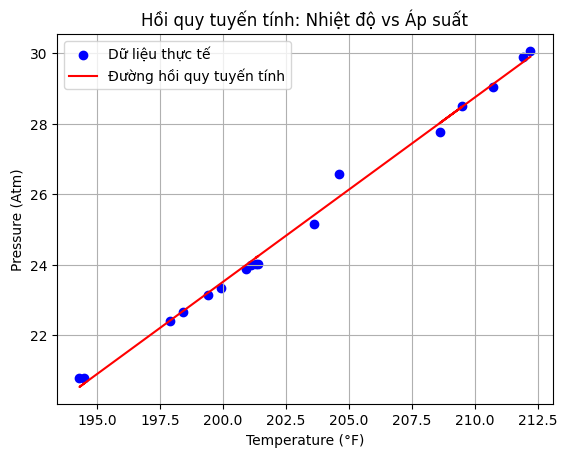

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Dữ liệu từ bạn
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
y = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]]).T

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán
y_pred = model.predict(X)

# In các tham số của mô hình
print("Hệ số góc (slope, β1):", model.coef_[0][0])  # Hệ số β1
print("Hệ số chặn (intercept, β0):", model.intercept_[0])  # Hệ số β0

# Tính các chỉ số đánh giá
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nKết quả đánh giá:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Trực quan hóa dữ liệu và đường hồi quy
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, y_pred, color='red', label='Đường hồi quy tuyến tính')
plt.xlabel('Temperature (°F)')
plt.ylabel('Pressure (Atm)')
plt.title('Hồi quy tuyến tính: Nhiệt độ vs Áp suất')
plt.legend()
plt.grid(True)
plt.show()

## Ví dụ B.2

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

### (1) Khai triển QR sử dụng Numpy

In [ ]:
def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: matrix 
# :param y_data: vector
# :return: w (regression estimate)
# """
    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)
    
    Q, R = np.linalg.qr(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula
    
    return np.dot(A, y_data)


w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457728426
                 Tax: -4.2279832083296105
                Dlic: 0.47187121344198085
              Income: -0.006135330970417462
            LogMiles: 18.545274506048006


### (2) Sử dụng thư viện Scikit-learn

In [14]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(x_data, y_data)

# Lấy các tham số hồi quy
intercept = model.intercept_  # Hệ số chặn (beta_0)
coefficients = model.coef_    # Các hệ số slope (beta_1, beta_2, beta_3, beta_4)

# In ra các tham số
print("Hệ số chặn (Intercept):", intercept)
print("Các hệ số slope (Coefficients):")
res = list(zip(['Tax', 'Dlic', 'Income', 'LogMiles'], np.array(coefficients)[0].T.tolist()))
for o in res:
    print("{: >20}: {: >10}".format(*o))

Hệ số chặn (Intercept): [154.19284458]
Các hệ số slope (Coefficients):
                 Tax: -4.227983208329684
                Dlic: 0.47187121344198685
              Income: -0.006135330970417716
            LogMiles: 18.54527450604802


## Ví dụ B.3 (Bài tập tự thực hành 1)

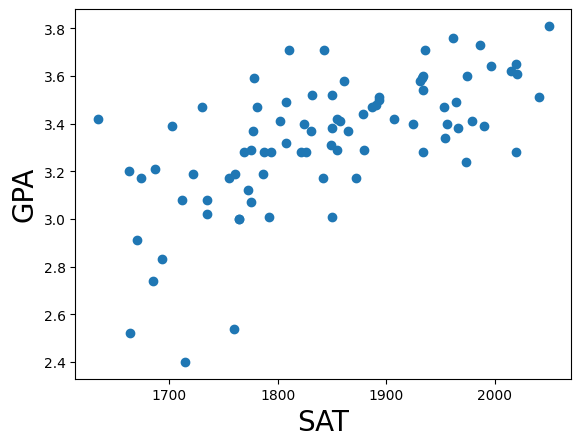

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Change to data path on your computer
data = pd.read_csv("SAT_GPA.csv")

# Show the description of data
data.describe()

# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


In [ ]:
data_len = len(x)

# Chuyển x, y thành ma trận dạng (n_samples, 1)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Lấy 64 mẫu dữ liệu đầu cho tập training
X_train = np.array(x[:64])
Y_train = np.array(y[:64])

# Dùng phần dữ liệu còn lại cho tập test
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

Y_pred = np.zeros(len(X_test))

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train)

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

# Lấy các tham số hồi quy
intercept = model.intercept_  # Hệ số chặn (beta_0)
coefficients = model.coef_    # Hệ số slope (beta_1)
# print(coefficients)

# In ra các tham số
print("Hệ số chặn (Intercept):", intercept)
print("Các hệ số slope (Coefficients):")
res = list(zip(['SAT'], np.array(coefficients)[0].T.tolist()))
for o in res:
    print("{: >20}: {: >10}".format(*o))
        
MSE = mean_squared_error(Y_pred, Y_test)
MAE = mean_absolute_error(Y_pred, Y_test)
R2 = r2_score(Y_test, Y_pred)
        
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {R2}")

[[0.00131839]]
Hệ số chặn (Intercept): [0.83820976]
Các hệ số slope (Coefficients):
                 SAT: 0.0013183893573835055
MSE: 0.07263824293181359
MAE: 0.24880371695218736
R_square: -9.667975169894788


## Ví dụ B.4 (Bài tập tự thực hành 2)

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression

with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()

# Bỏ dòng đầu tiên (header) và xử lý các dòng dữ liệu còn lại
data = []
for line in lines[1:]:  # Bỏ qua header
    # Tách các giá trị trong dòng và chuyển thành float
    values = [float(x) for x in line.split()[1:]]  # Bỏ cột ID
    data.append(values)

# Chuyển list thành mảng numpy
data_array = np.array(data)

# Tách x_data (các biến độc lập: TUOI, BMI, HA, GLUCOSE, CHOLESTEROL)
# Lấy cột 0, 1, 2, 3, 4
x_data = data_array[:, 0:5]

# Tách y_data (biến phụ thuộc: BEDAYNTM)
# Lấy cột 5
y_data = data_array[:, 5]

# Kiểm tra kết quả
print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)
print("\nx_data (first 5 rows):\n", x_data[:5])
print("\ny_data (first 5 rows):\n", y_data[:5])

x_data shape: (100, 5)
y_data shape: (100,)

x_data (first 5 rows):
 [[ 56.    21.   160.    14.     6.  ]
 [ 76.    18.   150.    12.     4.97]
 [ 63.    16.   160.     4.4    6.39]
 [ 78.    20.   100.     4.     7.  ]
 [ 87.    20.   110.     4.6    4.1 ]]

y_data (first 5 rows):
 [1.95 1.33 0.83 2.   1.3 ]


In [39]:
data_len = len(data_array)

# Lấy 80 mẫu dữ liệu đầu cho tập training
X_train = np.array(x_data[:80])
Y_train = np.array(y_data[:80])

# Dùng phần dữ liệu còn lại cho tập test
X_test = np.array(x_data[80:])
Y_test = np.array(y_data[80:])

Y_pred = np.zeros(len(X_test))

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train)

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

# Lấy các tham số hồi quy
intercept = model.intercept_  # Hệ số chặn (beta_0)
coefficients = model.coef_    # Các hệ số slope (beta_1, beta_2, beta_3, beta_4, beta_5)
print(coefficients)

# In ra các tham số
print("Hệ số chặn (Intercept):", intercept)
print("Các hệ số slope (Coefficients):")
res = list(zip(['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL'], coefficients))
for o in res:
    print("{: >20}: {: >10}".format(*o))
        
# Tính sai số (residuals)
residuals = Y_test - Y_pred

# Tính kỳ vọng của sai số (mean of residuals)
mean_residuals = np.mean(residuals)

# Tính phương sai của sai số (variance of residuals)
variance_residuals = np.var(residuals)

# In kết quả
# print(f"Sai số: {residuals}")
print(f"Kỳ vọng của sai số (Mean of residuals): {mean_residuals}")
print(f"Phương sai của sai số (Variance of residuals): {variance_residuals}")

[ 0.0089892  -0.00047742  0.00260218  0.00808634  0.00708535]
Hệ số chặn (Intercept): 0.04306436410329706
Các hệ số slope (Coefficients):
                TUOI: 0.008989196889296785
                 BMI: -0.00047742422185274944
                  HA: 0.002602179867555774
             GLUCOSE: 0.00808634223197815
         CHOLESTEROL: 0.007085352341923772
Kỳ vọng của sai số (Mean of residuals): 0.07998861696197108
Phương sai của sai số (Variance of residuals): 0.22100281283267012


## Ví dụ B.5 (Bài tập tự thực hành 3)

In [46]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file (giả sử file tên là 'real_estate.csv')
# Nếu dữ liệu trong file text, bạn có thể dùng pandas để đọc
data = pd.read_csv('real_estate.csv')

# Tách dữ liệu thành X (các đặc trưng) và Y (biến mục tiêu)
X = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values  # Lấy các cột X1 đến X6
Y = data['Y house price of unit area'].values  # Lấy cột Y (house price of unit area)

# Chia dữ liệu thành tập training (350 mẫu đầu) và tập validation (còn lại)
X_train = X[:350]  # 350 mẫu đầu cho training
Y_train = Y[:350]
X_val = X[350:]    # Phần còn lại cho validation
Y_val = Y[350:]

In [47]:
# Hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_val)
sse_lr = np.sum((Y_val - y_pred_lr) ** 2)
print(f"SSE Hồi quy tuyến tính: {sse_lr}")

# K-NN
knn = KNeighborsRegressor(n_neighbors=18)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_val)
sse_knn = np.sum((Y_val - y_pred_knn) ** 2)
print(f"SSE K-NN (K=18): {sse_knn}")

SSE Hồi quy tuyến tính: 4172.154528305365
SSE K-NN (K=18): 2821.451635802469
